# GHI
### The radiation reaching the earth's surface can be represented in a number of different ways. Global Horizontal Irradiance (GHI) is the total amount of shortwave radiation received from above by a surface horizontal to the ground.

### We have to predict GHI that is total amount of solar radiation recieved, given some independent weather features

In [1]:
!pip install pycaret

     |████████████████████████████████| 261 kB 4.4 MB/s 
     |████████████████████████████████| 14.2 MB 35.6 MB/s 
     |████████████████████████████████| 6.8 MB 36.8 MB/s 
     |████████████████████████████████| 102 kB 69.0 MB/s 
     |████████████████████████████████| 167 kB 35.6 MB/s 
     |████████████████████████████████| 1.1 MB 31.7 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 79 kB 147 kB/s 
     |████████████████████████████████| 1.7 MB 20.7 MB/s 
  Installing build dependencies ... - \ | done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ done
    Preparing wheel metadata ... - done
     |████████████████████████████████| 1.7 MB 32.2 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=4d4eb57d16916de103d73ea0509c32e3036ed33d53b0865fdc1940989af10d1c
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb

In [2]:
import pandas as pd 
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
pal = sns.color_palette("viridis", 10)
sns.set_palette(pal)

In [3]:
df = pd.read_csv('../input/solar-radiation-prediction-2016-to-2019/Weather data for radiation prediction.csv')

In [4]:
df.head()

Year  Month  Day  Hour  Minute  GHI  Clearsky GHI  Cloud Type  Dew Point  \
0  2016      1    1     0       0    0             0           1        2.2   
1  2016      1    1     1       0    0             0           1        2.5   
2  2016      1    1     2       0    0             0           1        2.8   
3  2016      1    1     3       0    0             0           1        3.1   
4  2016      1    1     4       0    0             0           1        3.3   

   Solar Zenith Angle  ...  Precipitable Water  Wind Direction  \
0              177.77  ...                 1.2             167   
1              163.98  ...                 1.2             179   
2              150.22  ...                 1.2             188   
3              136.54  ...                 1.2             197   
4              122.99  ...                 1.2             201   

   Relative Humidity  Temperature  Pressure  DHI  Clearsky DHI  DNI  \
0              40.16         15.7       974    0             0    0   
1              43.10         15.0       974    0             0    0   
2              44.81         14.7       974    0             0    0   
3              46.20         14.5       974    0             0    0   
4              48.00         14.2       974    0             0    0   

   Clearsky DNI  Ozone  
0             0  0.246  
1             0  0.246  
2             0  0.246  
3             0  0.246  
4             0  0.246  

[5 rows x 23 columns]

## Checking for null values

In [5]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
GHI                   0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Fill Flag             0
Surface Albedo        0
Wind Speed            0
Precipitable Water    0
Wind Direction        0
Relative Humidity     0
Temperature           0
Pressure              0
DHI                   0
Clearsky DHI          0
DNI                   0
Clearsky DNI          0
Ozone                 0
dtype: int64

### No null values

### We can drop some of the dependent features that we don't need like 
1. Clearsky GHI
2. DNI
3. Clearsky DNI
4. DHI
5. Clearsky DHI

In [6]:
df.drop(['Clearsky GHI','DHI','Clearsky DHI','DNI','Clearsky DNI'],axis=1, inplace=True)

In [7]:
df.shape

(35064, 18)

In [8]:
df.head()

Year  Month  Day  Hour  Minute  GHI  Cloud Type  Dew Point  \
0  2016      1    1     0       0    0           1        2.2   
1  2016      1    1     1       0    0           1        2.5   
2  2016      1    1     2       0    0           1        2.8   
3  2016      1    1     3       0    0           1        3.1   
4  2016      1    1     4       0    0           1        3.3   

   Solar Zenith Angle  Fill Flag  Surface Albedo  Wind Speed  \
0              177.77          0            0.17         1.1   
1              163.98          0            0.17         1.2   
2              150.22          0            0.17         1.2   
3              136.54          0            0.17         1.2   
4              122.99          0            0.17         1.2   

   Precipitable Water  Wind Direction  Relative Humidity  Temperature  \
0                 1.2             167              40.16         15.7   
1                 1.2             179              43.10         15.0   
2                 1.2             188              44.81         14.7   
3                 1.2             197              46.20         14.5   
4                 1.2             201              48.00         14.2   

   Pressure  Ozone  
0       974  0.246  
1       974  0.246  
2       974  0.246  
3       974  0.246  
4       974  0.246

## Check Corelation

<AxesSubplot:>

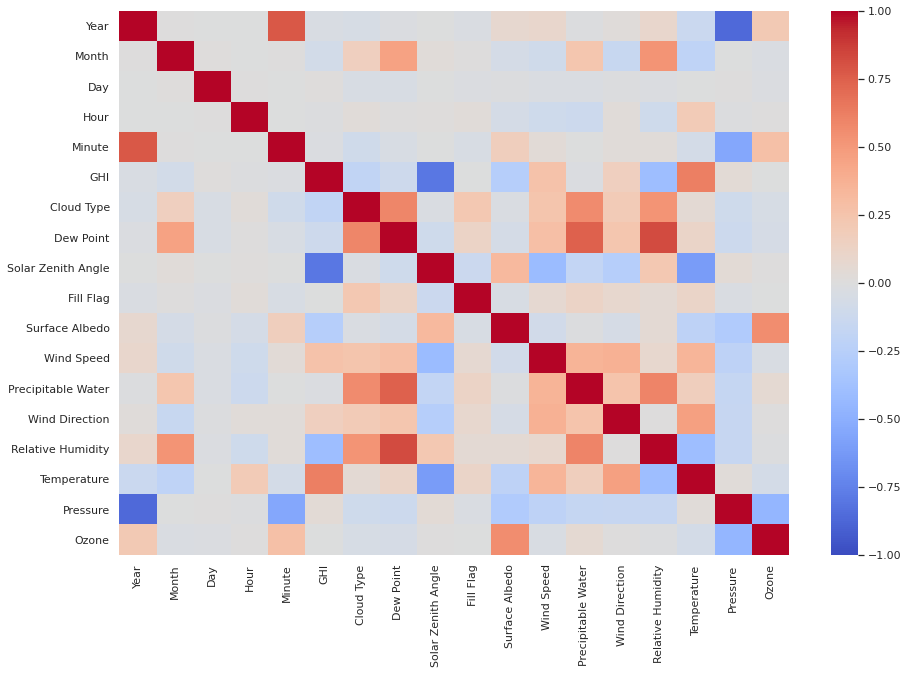

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(data= df.corr(), vmin=-1,vmax=1, cmap='coolwarm')

## Visualising the Variable dependencies

### There are alot of variables so we are considering only a subset of features

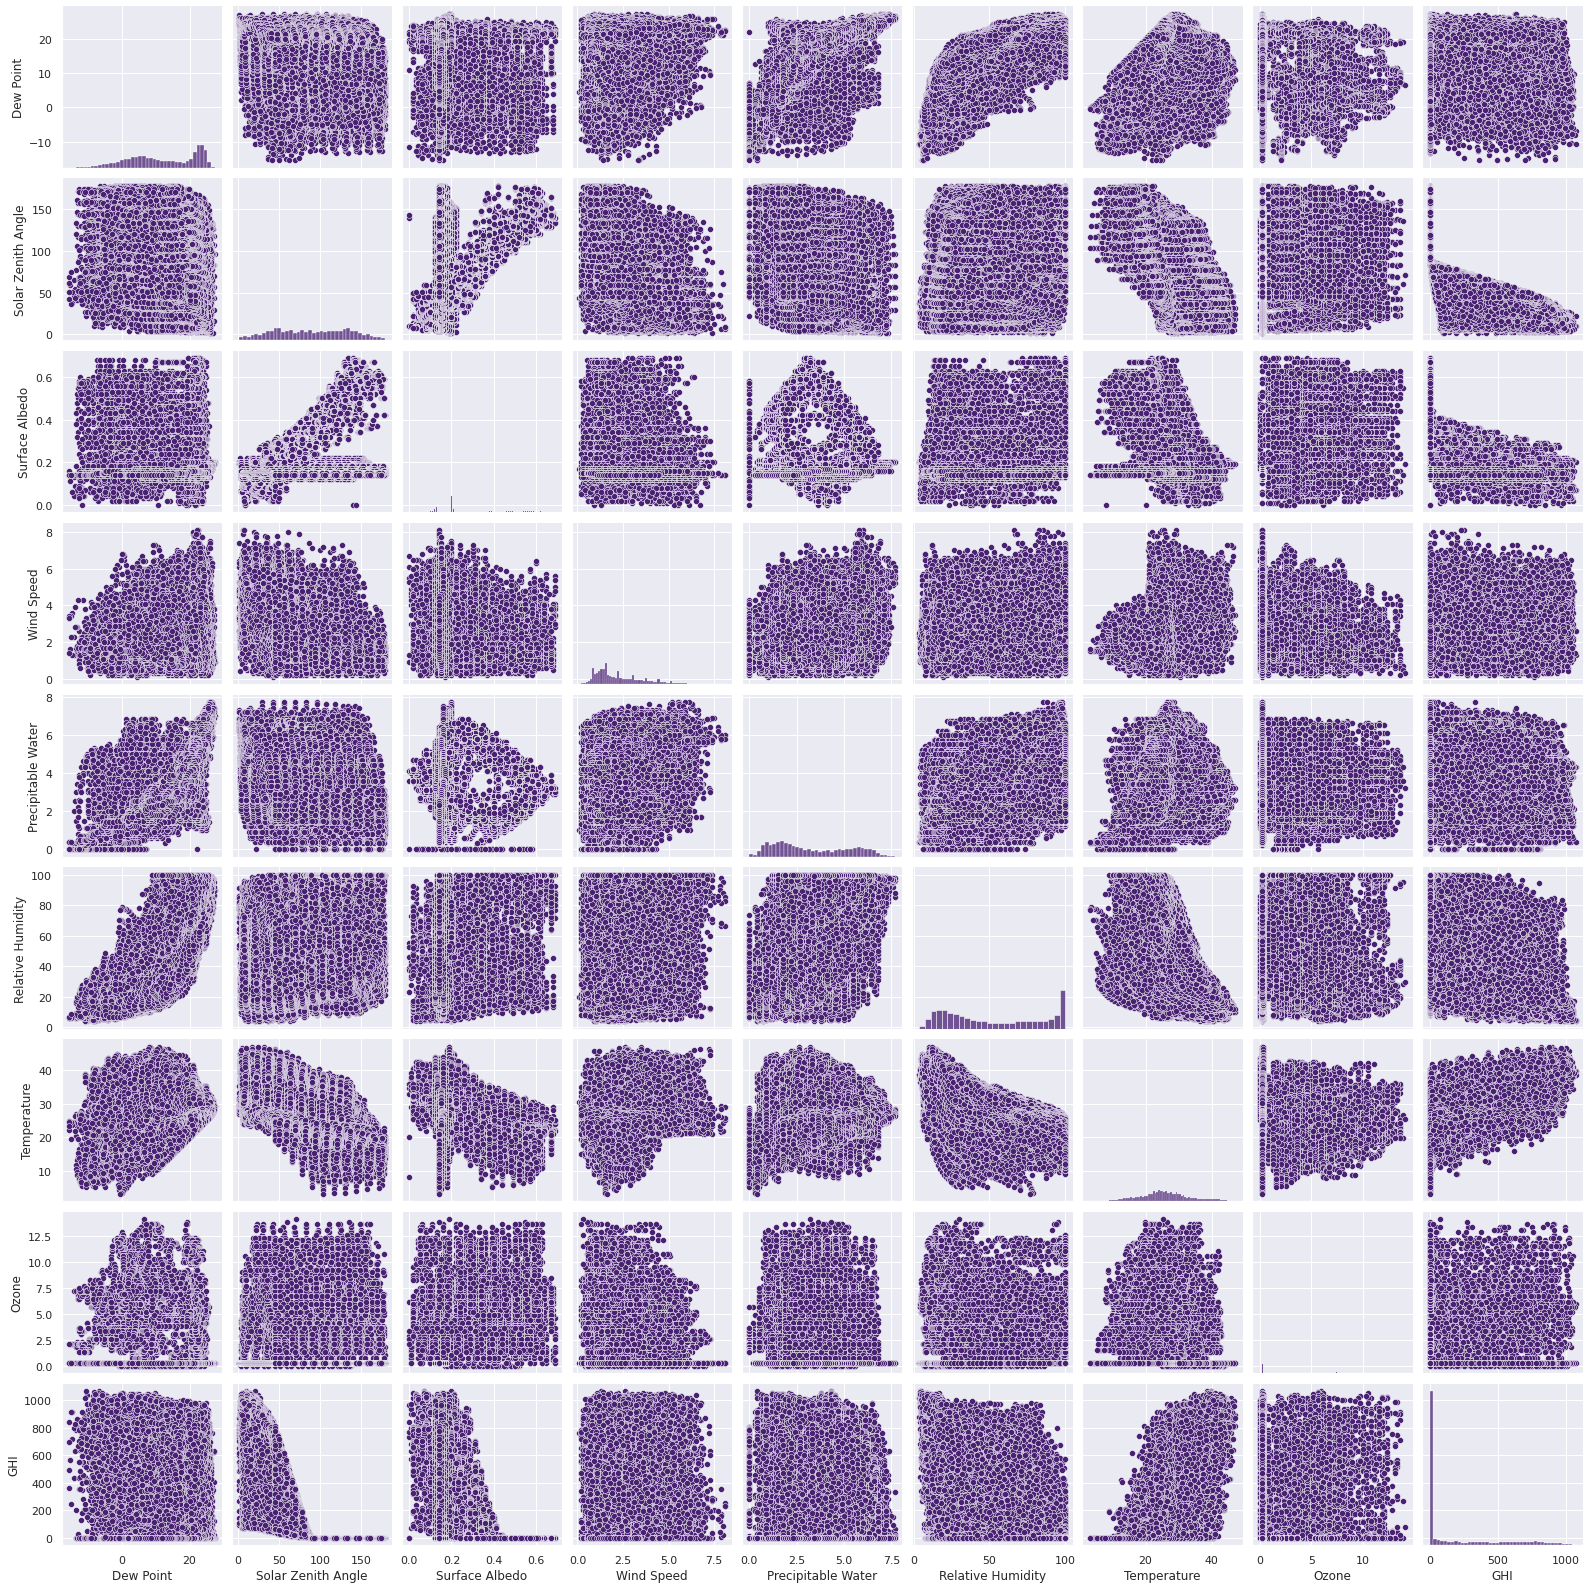

In [10]:
col =[i for i in df.columns if df[str(i)].dtype =='float64']
col.append('GHI')
sns.pairplot(df[col])

## UNIVARIATE ANALYSIS

### YEAR

In [11]:
df.Year.value_counts()

2016    8784
2017    8760
2018    8760
2019    8760
Name: Year, dtype: int64

<AxesSubplot:title={'center':'Mean GHI over the years 2016-2019'}, xlabel='Year', ylabel='mean GHI'>

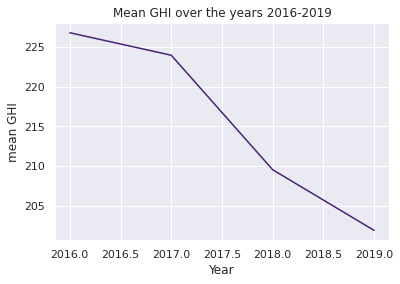

In [12]:
df.groupby('Year')['GHI'].mean().plot(ylabel='mean GHI',title='Mean GHI over the years 2016-2019')

mean GHI is dropped over the span of 4 years, Lets deep dive and analyse the months

### Month

<AxesSubplot:xlabel='Month', ylabel='GHI'>

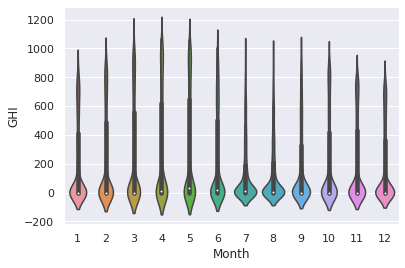

In [13]:
sns.violinplot(data=df,x='Month',y='GHI')

### Month of July showing more 0 and lower values because of possible rainy season and CLOUD cover

<AxesSubplot:xlabel='Month'>

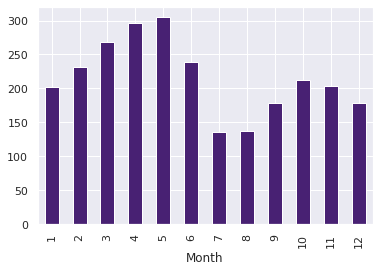

In [14]:
df.groupby('Month').GHI.mean().plot(kind='bar')

### Trends over the years

<AxesSubplot:title={'center':'2016'}, xlabel='Month'>

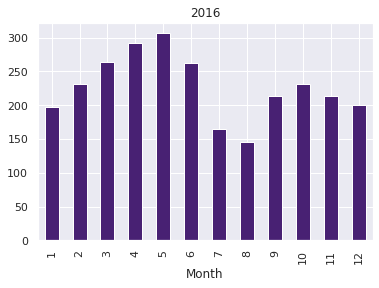

In [15]:
df[df['Year']==2016].groupby('Month').GHI.mean().plot(kind='bar',title='2016')

<AxesSubplot:title={'center':'2017'}, xlabel='Month'>

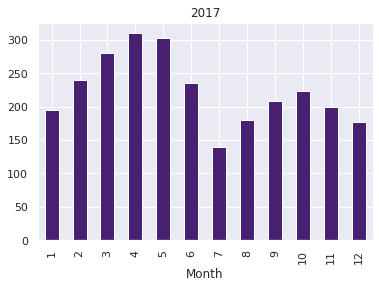

In [16]:
df[df['Year']==2017].groupby('Month').GHI.mean().plot(kind='bar',title='2017')

<AxesSubplot:title={'center':'2018'}, xlabel='Month'>

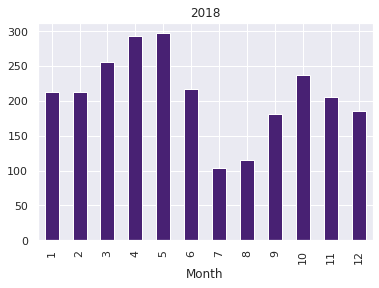

In [17]:
df[df['Year']==2018].groupby('Month').GHI.mean().plot(kind='bar',title='2018')

<AxesSubplot:title={'center':'2019'}, xlabel='Month'>

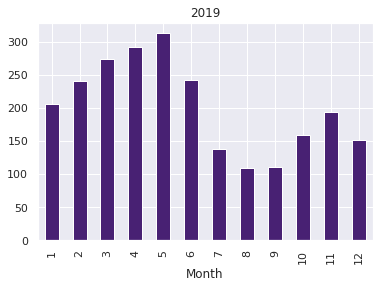

In [18]:
df[df['Year']==2019].groupby('Month').GHI.mean().plot(kind='bar',title='2019')

### So over the years the highest mean GHI is recorded in April-May and lowest in July-August

## Hour

<AxesSubplot:xlabel='Hour', ylabel='Mean GHI'>

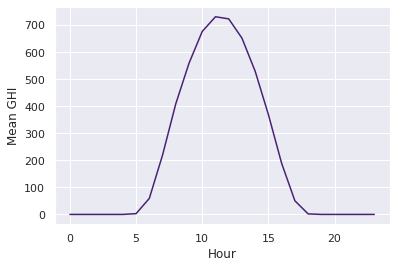

In [19]:
df.groupby('Hour').GHI.mean().plot(ylabel='Mean GHI')

Most GHI recorded around 11 am to 1 pm

## Cloud Type

<AxesSubplot:ylabel='Cloud Type'>

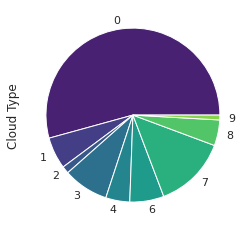

In [20]:
df.groupby('Cloud Type')['Cloud Type'].count().plot(kind='pie')

<AxesSubplot:xlabel='Cloud Type', ylabel='Frequency'>

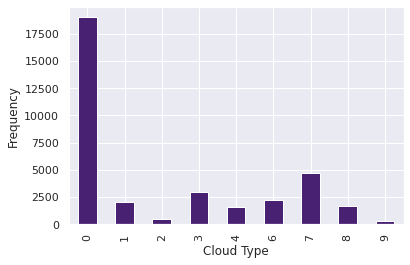

In [21]:
df.groupby('Cloud Type')['Cloud Type'].count().plot(kind='bar',ylabel='Frequency')

<AxesSubplot:xlabel='Cloud Type', ylabel='Mean GHI'>

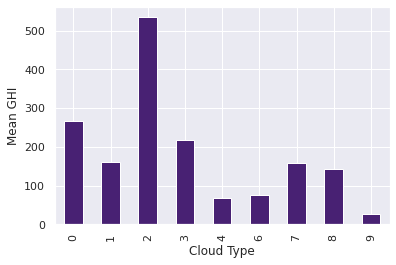

In [22]:
df.groupby('Cloud Type').GHI.mean().plot(kind='bar',ylabel='Mean GHI')

<AxesSubplot:xlabel='Cloud Type', ylabel='GHI'>

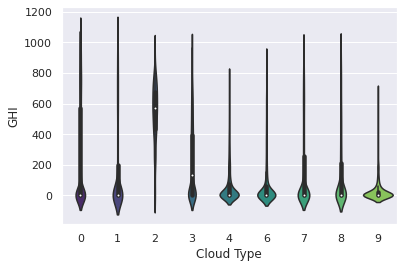

In [23]:
sns.violinplot(data=df,x='Cloud Type',y='GHI')

### cloud type 9 has more 0 values 

## DEW POINT

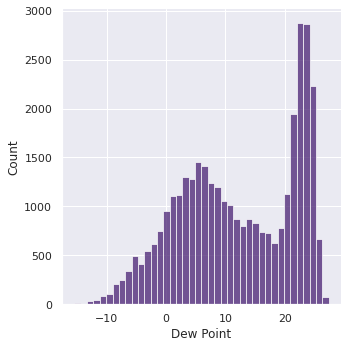

In [24]:
sns.displot(kind='hist', data=df, x= 'Dew Point')

<AxesSubplot:xlabel='Month', ylabel='Dew Point'>

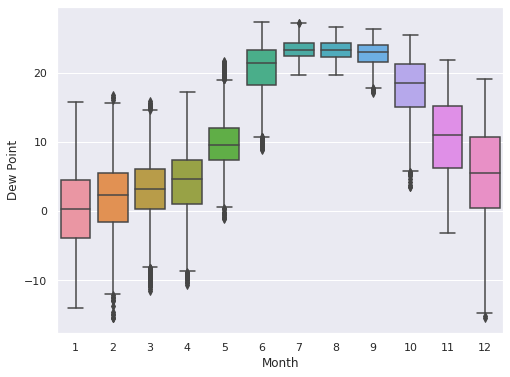

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='Month', y='Dew Point')

## Solar Zenith Angle

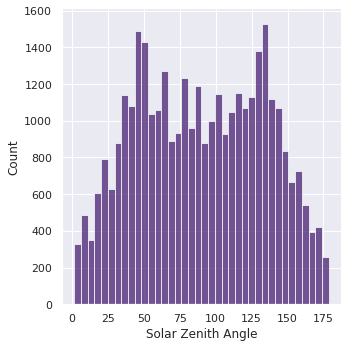

In [26]:
sns.displot(kind='hist',data=df, x='Solar Zenith Angle')

## Fill Flag

<AxesSubplot:ylabel='Fill Flag'>

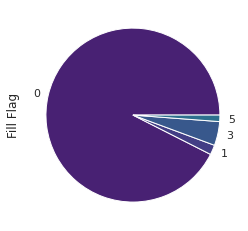

In [27]:
df.groupby('Fill Flag')['Fill Flag'].count().plot(kind='pie')

<AxesSubplot:xlabel='Fill Flag', ylabel='Mean GHI'>

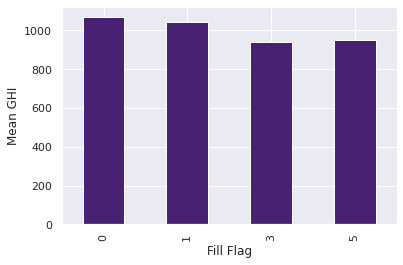

In [28]:
df.groupby('Fill Flag').GHI.max().plot(kind='bar',ylabel='Mean GHI')

<AxesSubplot:xlabel='Fill Flag', ylabel='GHI'>

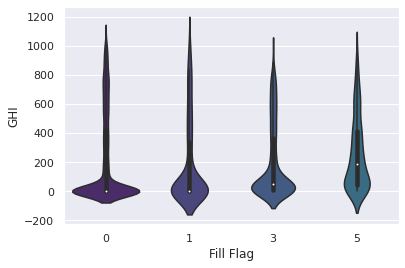

In [29]:
sns.violinplot(data=df,x='Fill Flag',y='GHI')

## Surface Albedo

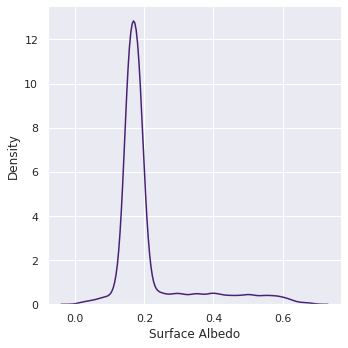

In [30]:
sns.displot(kind='kde',data=df,x='Surface Albedo')

<AxesSubplot:ylabel='Surface Albedo'>

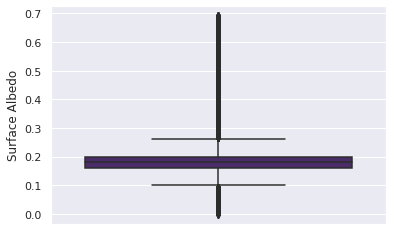

In [31]:
sns.boxplot(data=df,y='Surface Albedo')

### As we can see due to skewed data it is showing noisy outliers

## Wind Speed

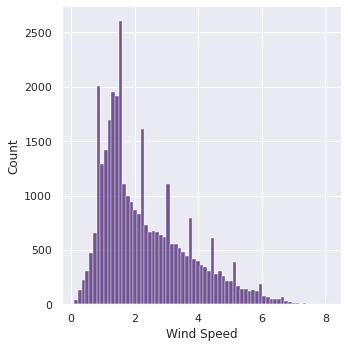

In [32]:
sns.displot(kind='hist',data=df,x='Wind Speed')

<AxesSubplot:ylabel='Wind Speed'>

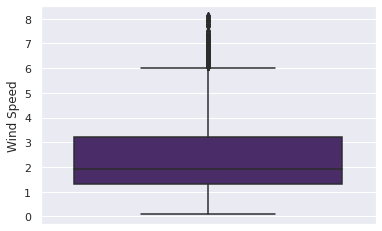

In [33]:
sns.boxplot(data=df, y='Wind Speed')

<AxesSubplot:xlabel='Month', ylabel='Wind Speed'>

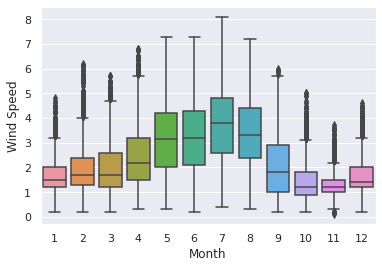

In [34]:
sns.boxplot(data=df, x='Month',y='Wind Speed')

## Precipitable Water

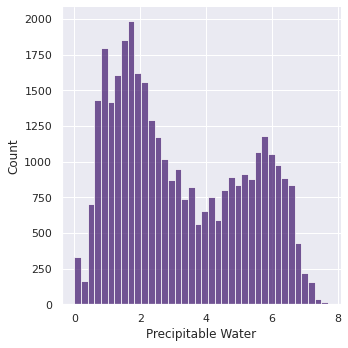

In [35]:
sns.displot(kind='hist',data=df,x='Precipitable Water')

<AxesSubplot:ylabel='Precipitable Water'>

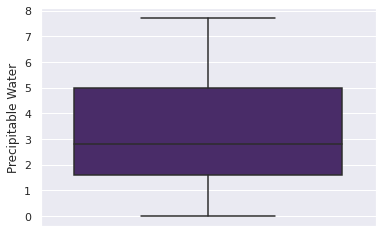

In [36]:
sns.boxplot(data=df,y='Precipitable Water')

<AxesSubplot:xlabel='Month', ylabel='Precipitable Water'>

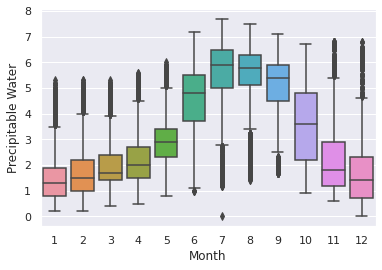

In [37]:
sns.boxplot(data=df,y='Precipitable Water',x='Month')

### As Expected Most precioitation in July 

## Wind Direction

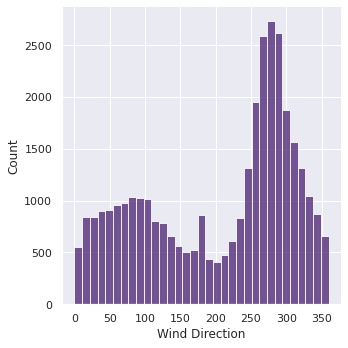

In [38]:
sns.displot(data=df,kind='hist',x='Wind Direction')

In [39]:
df.groupby('Wind Direction')['GHI'].mean().sort_values(ascending=False).head(10)

Wind Direction
355    387.675676
336    380.978261
315    376.398438
344    371.012500
334    370.277778
351    366.492754
309    365.692857
312    364.826389
354    363.888889
323    363.227941
Name: GHI, dtype: float64

### Top 10 Mean GHI Recorded with **>300** angles

## Relative Humidity

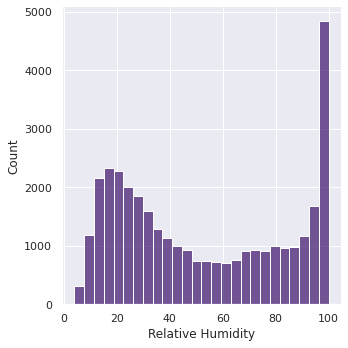

In [40]:
sns.displot(kind='hist',data=df,x='Relative Humidity')

<AxesSubplot:ylabel='Relative Humidity'>

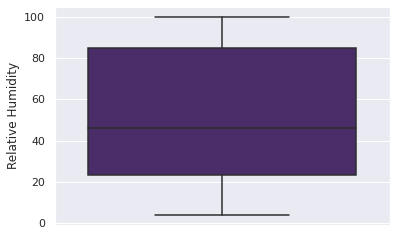

In [41]:
sns.boxplot(data=df,y='Relative Humidity')

<AxesSubplot:xlabel='Month', ylabel='Relative Humidity'>

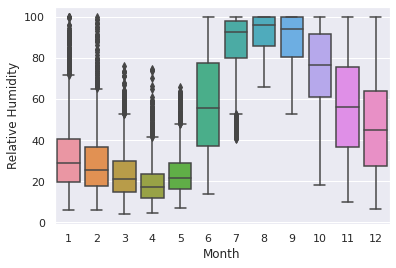

In [42]:
sns.boxplot(data=df,x='Month',y='Relative Humidity')

In [43]:
df.groupby('Relative Humidity')['GHI'].mean().sort_values(ascending=False).head(10)

Relative Humidity
5.06    1068.0
4.02    1068.0
4.55    1061.0
4.81    1053.0
5.34    1052.0
5.08    1047.0
5.95    1039.0
8.29    1038.0
4.31    1038.0
5.27    1037.0
Name: GHI, dtype: float64

### This Shows That Lower Humidities will Have positive impact on GHI

## Temperature

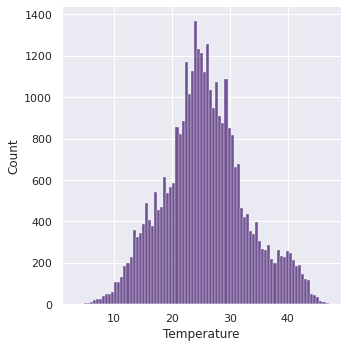

In [44]:
sns.displot(data=df,kind='hist',x='Temperature')

<AxesSubplot:ylabel='Temperature'>

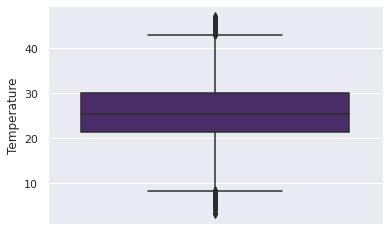

In [45]:
sns.boxplot(data = df,y = 'Temperature')

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

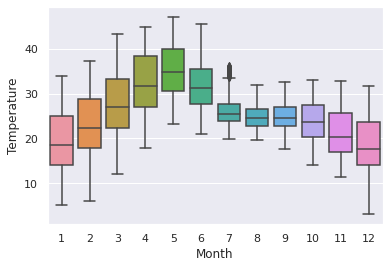

In [46]:
sns.boxplot(data = df,x='Month',y = 'Temperature')

### As You can see Tempertur trend is Normal, Most fluctuations are in July due to Monsoons

In [47]:
df.groupby('Temperature')['GHI'].mean().sort_values(ascending=False).head(10)

Temperature
46.7    997.000000
45.9    975.500000
46.8    963.000000
44.7    938.222222
46.1    920.666667
44.8    911.875000
47.1    893.000000
44.3    891.300000
44.9    883.833333
45.6    882.666667
Name: GHI, dtype: float64

### Higher Temperatures are mainly responsible for higher GHI, which is as expected, 
### Thats why Most GHI is recorede in May-April because those months recorded highest avg Temperatures

## Pressure

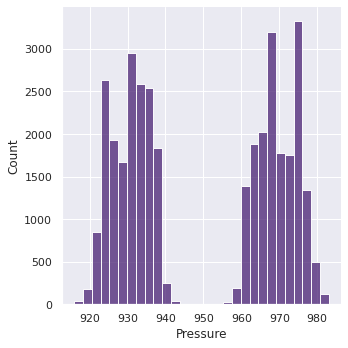

In [48]:
sns.displot(data=df,x='Pressure',kind='hist')

<AxesSubplot:title={'center':'Mean GHI vs Pressure'}, xlabel='Pressure', ylabel='Mean GHI'>

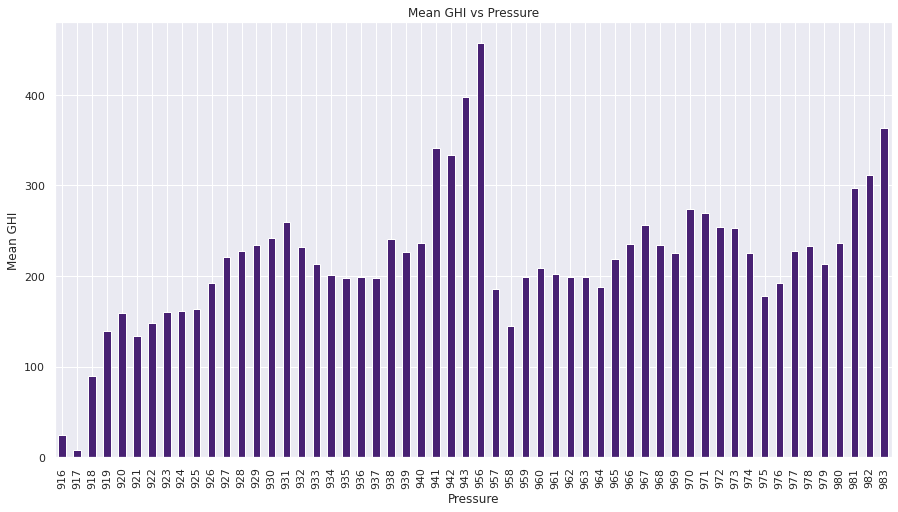

In [49]:
plt.figure(figsize=(15,8))
df.groupby('Pressure')['GHI'].mean().plot(kind='bar',ylabel='Mean GHI',title='Mean GHI vs Pressure')

## Ozone

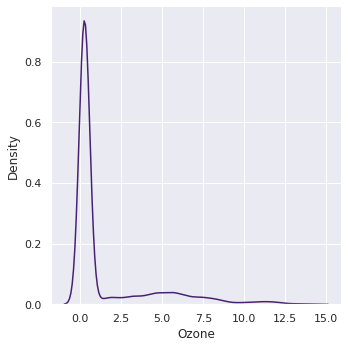

In [50]:
sns.displot(data=df,x='Ozone',kind='kde')

### Very Skewed Data available, we can visualize it through a boxplot as well

<AxesSubplot:ylabel='Ozone'>

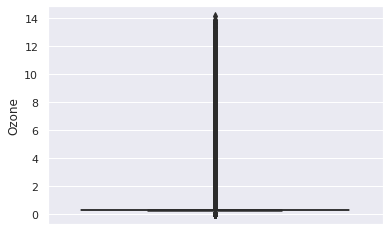

In [51]:
sns.boxplot(data=df,y='Ozone')

### EDA Finished

# Model Building

### For Model building and Selection we will use automated Library Pycaret 🥕

### Setup

In [52]:
from pycaret.regression import *
log = setup(data=df, target='GHI',remove_outliers=True, silent=True ,feature_selection=True,  train_size=0.8)

In [53]:
log[10]

Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False)

### Model Selection

In [54]:
compare_models()

## Catboost Regressor is the Most accurate model according to R2 value

### Building individual and Blend of top 

In [55]:
cb = create_model('catboost')

In [56]:
lgbm = create_model('lightgbm')

In [57]:
et = create_model('et')

## Blend of CatBoost LGBM and extra trees

In [58]:
blender = blend_models(estimator_list=[cb,lgbm,et])

## Stack Model

In [59]:
stacker = stack_models(estimator_list=[et,lgbm], meta_model=cb)

# Analysing Models

## Catboost

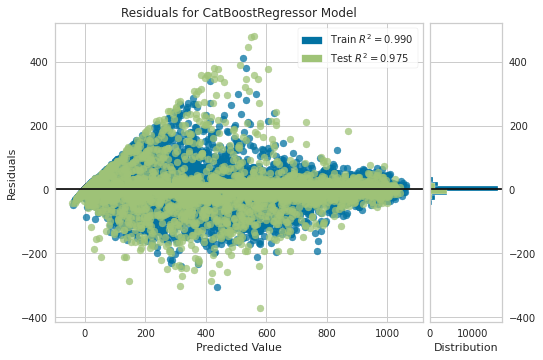

In [60]:
plot_model(cb)

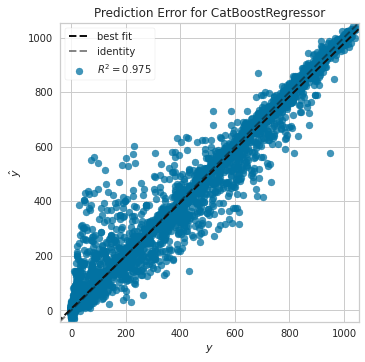

In [61]:
plot_model(cb, plot='error')

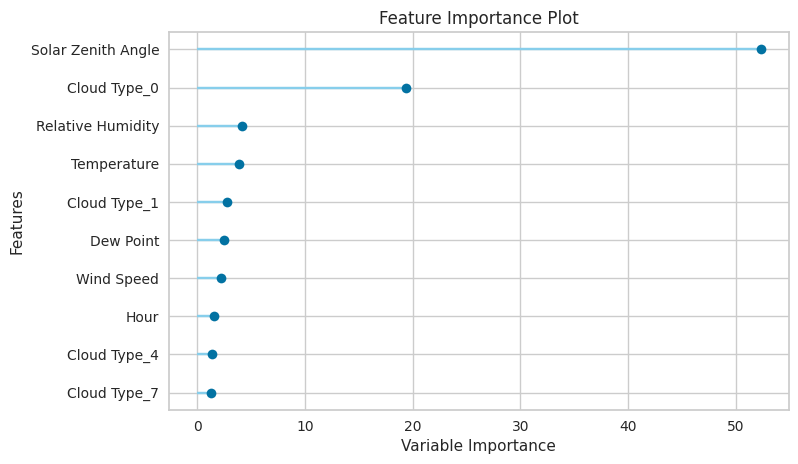

In [62]:
plot_model(cb, plot='feature')

## LGBM

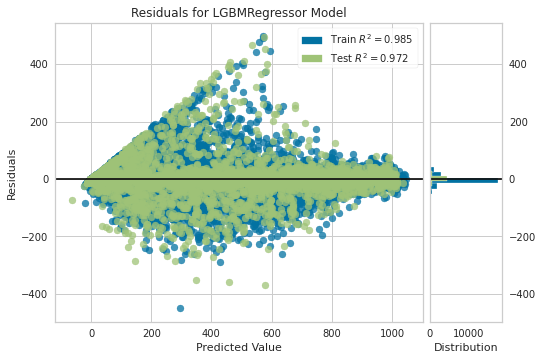

In [63]:
plot_model(lgbm)

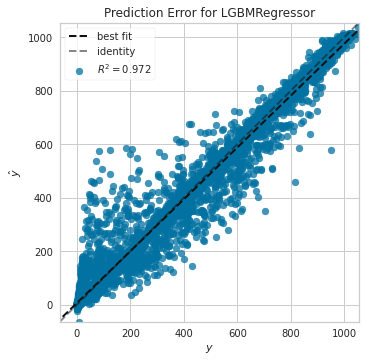

In [64]:
plot_model(lgbm, plot='error')

## Extra Tree 

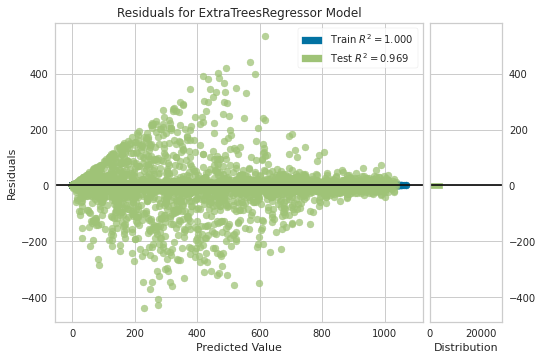

In [65]:
plot_model(et)

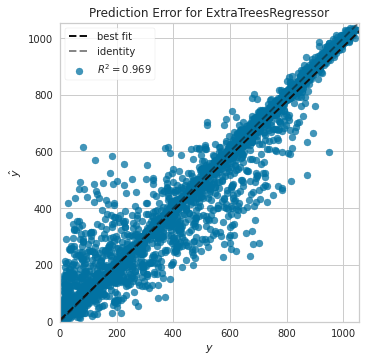

In [66]:
plot_model(et, plot='error')

## Blender

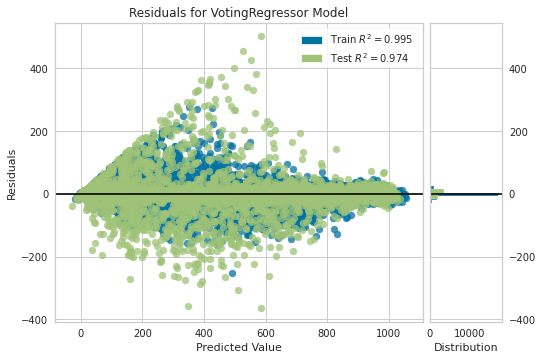

In [67]:
plot_model(blender)

## Stacker

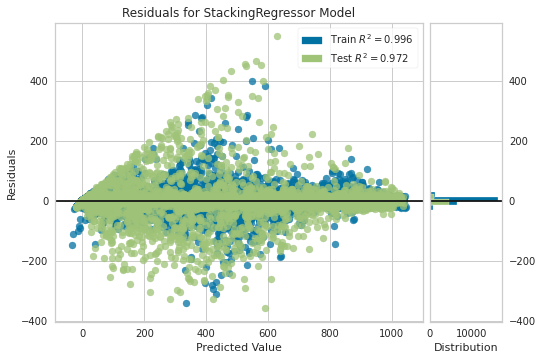

In [68]:
plot_model(stacker)

# Interpreting Model

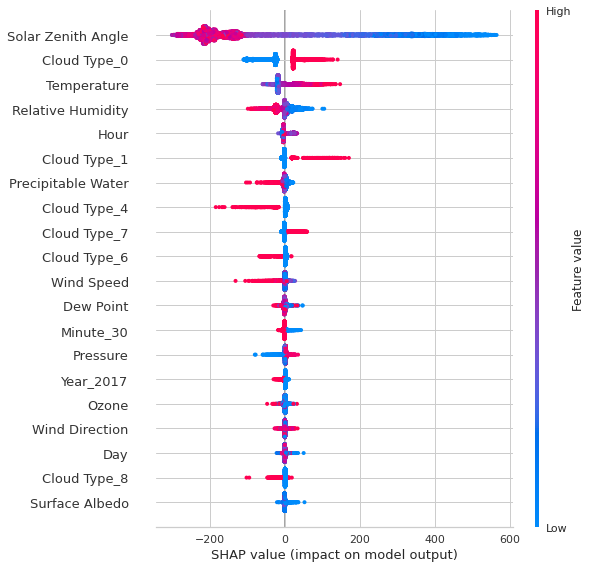

In [69]:
interpret_model(cb)

## Will Keep updating with further steps, Stay tuned!! 